In [1]:
!which python

/home/raphael/devel/tortello/env/tortello_desktop/bin/python


### Dumping topic into CSV

In [37]:
! ros2 topic echo --csv /odom 
odom_dump = "~/devel/tortello/log/topics/odom.csv"

Could not determine the type for the passed topic


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
odom = pd.read_csv(odom_dump, names=['x', 'y', 'z', 'x_ang', 'y_ang', 'z_ang'])

/home/raphael/devel/tortello/env/tortello_desktop/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


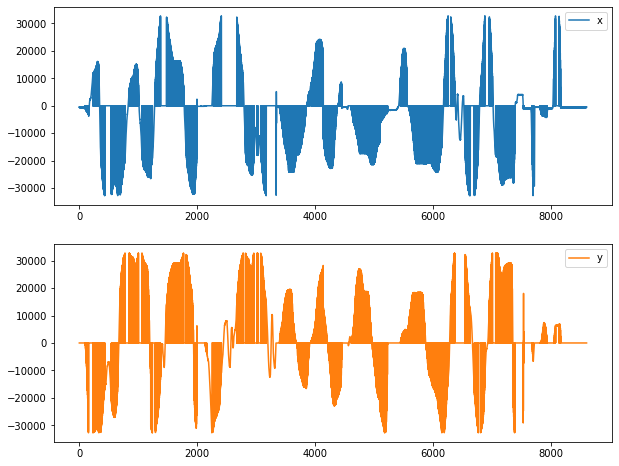

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
odom[['x','y']].plot(subplots=True, ax=ax)

<AxesSubplot:>

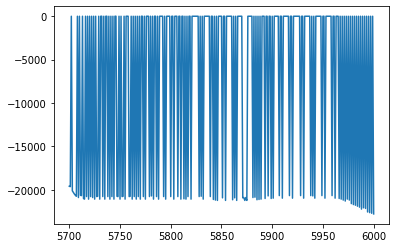

In [67]:
odom.loc[5700:6000,"x"].plot()

In [77]:
del odom_x 

(3812, 4219, 337)

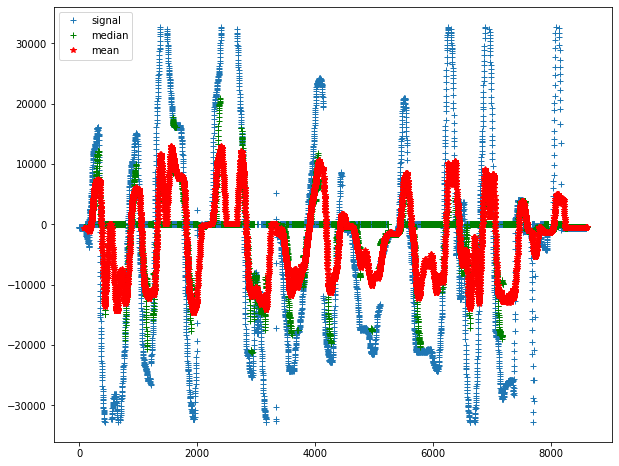

In [452]:
fig, ax = plt.subplots(figsize=(10,8))

W = 80

ax.plot(odom.x, '+', label='signal')
ax.plot(odom.x.rolling(W).median(), 'g+', label='median')
ax.plot(odom.x.rolling(W).mean(), 'r*', label='mean')
plt.legend()


((odom.x == 0).sum() ) , (odom.x.rolling(W).median() == 0).sum(), (odom.x.rolling(W).mean() == 0).sum()

In [104]:
vals = []
for W in range(0, 4000):
    vals.append([((odom.x == 0).sum() ) , (odom.x.rolling(W).median() == 0).sum(), (odom.x.rolling(W).mean() == 0).sum()])
    
vals = np.array(vals)

<AxesSubplot:>

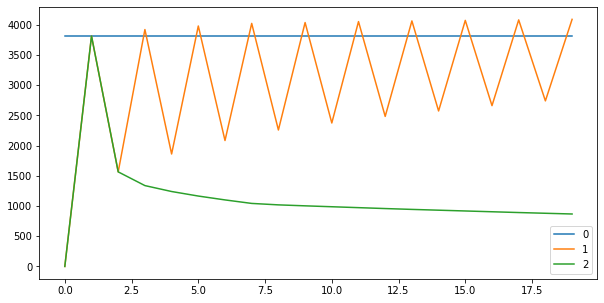

In [112]:
pd.DataFrame(vals[:20,:]).plot(figsize=(10,5))

In [321]:
def prev_filter_dec(t, var=.2):
    prev = t
    def prev_filter(t):
        nonlocal prev
        if abs((prev - t) / prev) > var:
            print(f"prev={prev}, t={t}, filtered-out !")
            return prev
        else:
            prev = t
            print(f"prev={prev}, t={t}, pass !")
            return t
    return prev_filter
        

